In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info
Works on 18-bit signed fixed-point numbers. Inputs and outputs assumed to be in range of -1 to 1. Outliers are saturated.

# Examples

## Noise removal

In [3]:
np.random.seed(0)
N = 1024
t = np.linspace(0,2*2*np.pi,N)
signal = 0.8*np.sin(t)
noise = 0.1*np.random.normal(size=N)
input_signal = signal + noise # noisy input signal

dut = MovingAverage(window_len=128) # design we are testing
sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto') # run simulations and gather trace
plot_trace()

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 1024/1024 [00:00<00:00, 21608.16it/s]

INFO:sim:Flushing the pipeline to collect 1024 valid samples (currently have 1022)
INFO:sim:Flush took 2 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Frequency response

In [4]:
input_signal = [0.0] * 1024* 4
input_signal[0] = 1.0

dut = MovingAverage(window_len=128)
sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto') # run simulations and gather trace
# plot stuff?

NameError: name 'Simulator' is not defined

## Matched filter

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 2048/2048 [00:00<00:00, 22870.63it/s]

INFO:sim:Flushing the pipeline to collect 2048 valid samples (currently have 2046)
INFO:sim:Flush took 2 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


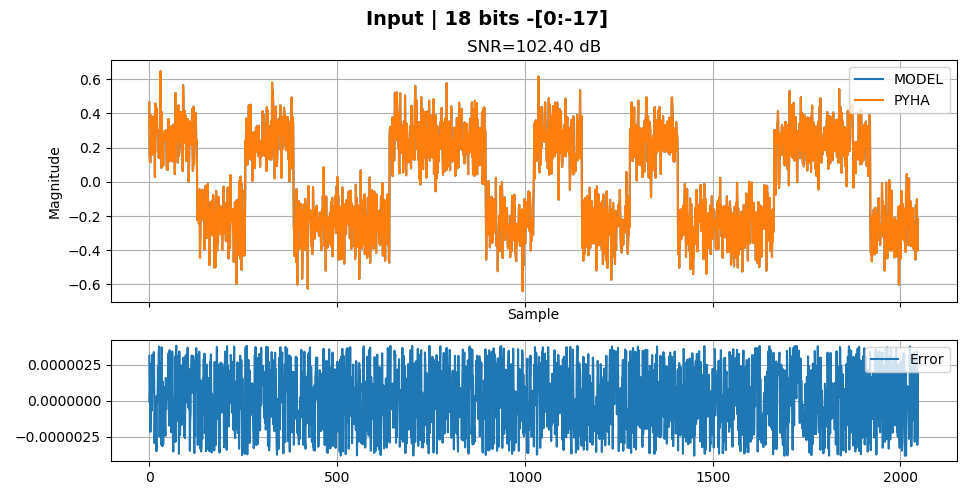

<IPython.core.display.Javascript object>


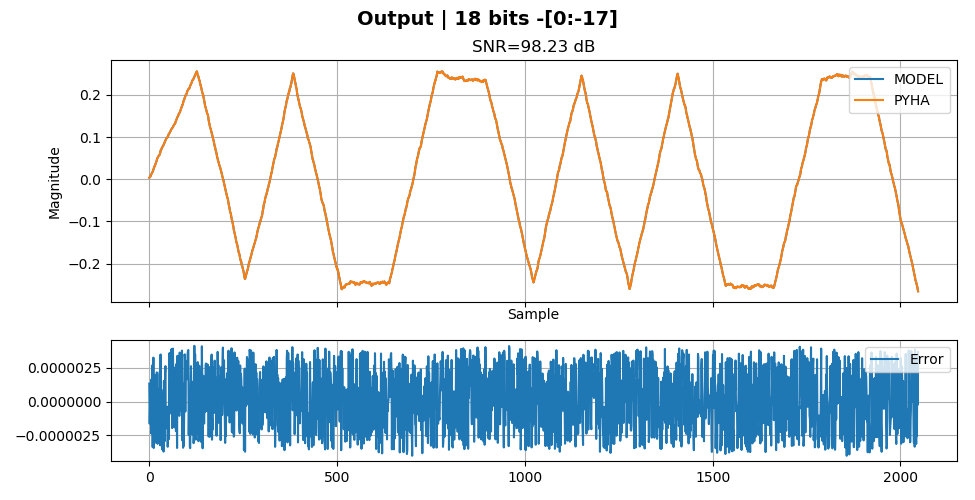

In [5]:
samples_per_bit = 128
bits = [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0]
oversample = np.array([[x] * samples_per_bit for x in bits]).flatten()
input_signal = (oversample + np.random.normal(size=len(oversample))*0.5) * 0.25

dut = MovingAverage(window_len=samples_per_bit)
sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto') # run simulations and gather trace
plot_trace()

# Conversion to VHDL and RTL/NETLIST simulations

In [8]:
# Pyha design can be converted to VHDL after the PYHA simulation has been ran
# VHDL sources can be used to run the RTL simulation, in addition NETLIST simulation is supported (after Quartus mapper)
# Pyha automatically manages everything needed if you specify the 'RTL', 'NETLIST' flags.
output_dir = '~/Documents/pyha_output'
input_signal = np.random.normal(size=512) * 0.25
dut = MovingAverage(window_len=128)
sims = simulate(dut, input_signal, pipeline_flush='auto', simulations=['MODEL', 'PYHA', 'RTL', 'GATE']) # run simulations and gather trace

INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 512/512 [00:00<00:00, 4125.17it/s]

INFO:sim:Flushing the pipeline to collect 512 valid samples (currently have 510)
INFO:sim:Flush took 2 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...


INFO:conversion:Took 0.25 seconds
INFO:sim:Running "RTL" simulation...
loading VPI module '/cocotb/build/libs/x86_64/libvpi.so'
VPI module loaded!
100%|##########| 514/514 [00:00<00:00, 4745.76it/s]

INFO:sim:OK!
INFO:sim:Running "NETLIST" simulation...
INFO:synth:Running quartus_map quartus_project...
/quartus/adm/qenv.sh: line 83: warning: setlocale: LC_CTYPE: cannot change locale (en_US.UTF-8): No such file or directory
INFO:synth:Running quartus_eda quartus_project...
/quartus/adm/qenv.sh: line 83: warning: setlocale: LC_CTYPE: cannot change locale (en_US.UTF-8): No such file or directory
loading VPI module '/cocotb/build/libs/x86_64/libvpi.so'
VPI module loaded!
100%|##########| 514/514 [00:00<00:00, 588.33it/s]

INFO:sim:Simulations completed!


# Synthesis:  resource usage and Fmax

In [ ]:
print(vhdl_sim.quartus.get_resource_usage('fit'))
print(vhdl_sim.quartus.get_fmax())